In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 2: Load the unscaled data
path = '/Users/andrewfearney27/Downloads/Dataset-weather-prediction-dataset-processed.csv'
weather_data = pd.read_csv(path)


In [17]:
# Limiting dataset to 1993
df_1993 = weather_data[weather_data['DATE'].astype(str).str.contains('1993')]

# Scaling the data for machine learning
scaler = StandardScaler()
scaled_1993 = pd.DataFrame(scaler.fit_transform(df_1993), columns=df_1993.columns)

# Display the first few rows of the scaled dataset
scaled_1993.head()


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.644406,-1.602745,-1.255477,-1.556361,1.141412,1.858286,-0.782989,-0.474452,-0.196618,-0.217277,...,0.529462,0.954392,0.774563,-1.160836,-0.427323,0.0,-0.855656,-0.749731,-0.649800,-0.771904
1,-1.641508,-1.602745,-0.349846,-0.126050,0.868639,1.882457,-1.066220,-0.474452,-0.196618,-0.995481,...,0.529462,0.675821,0.688505,-1.012271,-0.286020,0.0,-0.855656,-0.176772,0.501272,-0.864624
2,-1.638609,-1.602745,-1.255477,0.112335,0.414017,1.580315,-0.782989,-0.474452,-0.196618,-0.358769,...,0.529462,0.257964,-0.283942,-1.148455,3.143789,0.0,-0.855656,-0.272265,0.023998,-0.555557
3,-1.635711,-1.602745,-1.255477,-1.079591,0.414017,1.664915,-0.793883,-0.474452,-0.196618,-0.547424,...,-0.029074,0.118679,-0.111827,-1.098934,2.514349,0.0,-0.855656,-0.367758,-0.453276,-0.215584
4,-1.632812,-1.602745,-1.255477,3.926498,-0.222453,2.281286,-0.684948,-0.474452,-0.196618,0.348690,...,0.529462,0.257964,-0.068799,-1.136075,-0.080488,0.0,-0.855656,-0.781562,-0.369051,-0.246491


In [18]:
print(weather_data.columns)


Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)


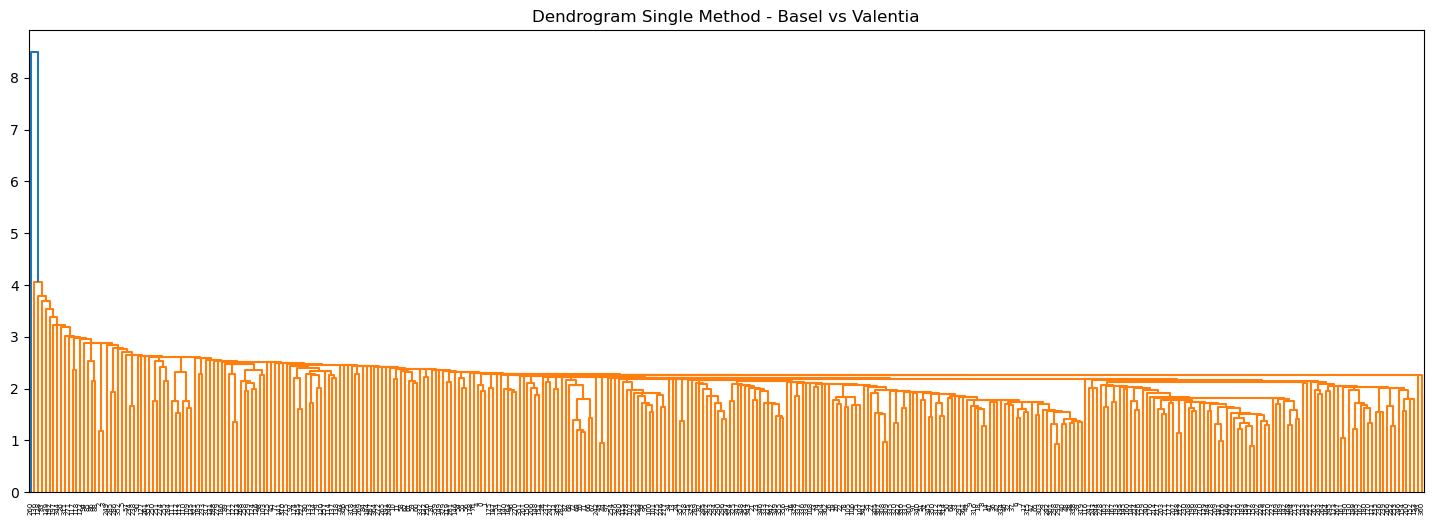

In [24]:
# Updated column list based on existing columns
columns_basel_valentia = [
    'BASEL_cloud_cover', 'BASEL_humidity', 
    'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 
    'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
    'VALENTIA_cloud_cover', 'VALENTIA_humidity', 
    'VALENTIA_pressure', 'VALENTIA_global_radiation', 'VALENTIA_precipitation', 
    'VALENTIA_sunshine', 'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max'
]

#Single method
distance_single = linkage(scaled_1993[columns_basel_valentia], method='single')
plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.title('Dendrogram Single Method - Basel vs Valentia')
plt.show()



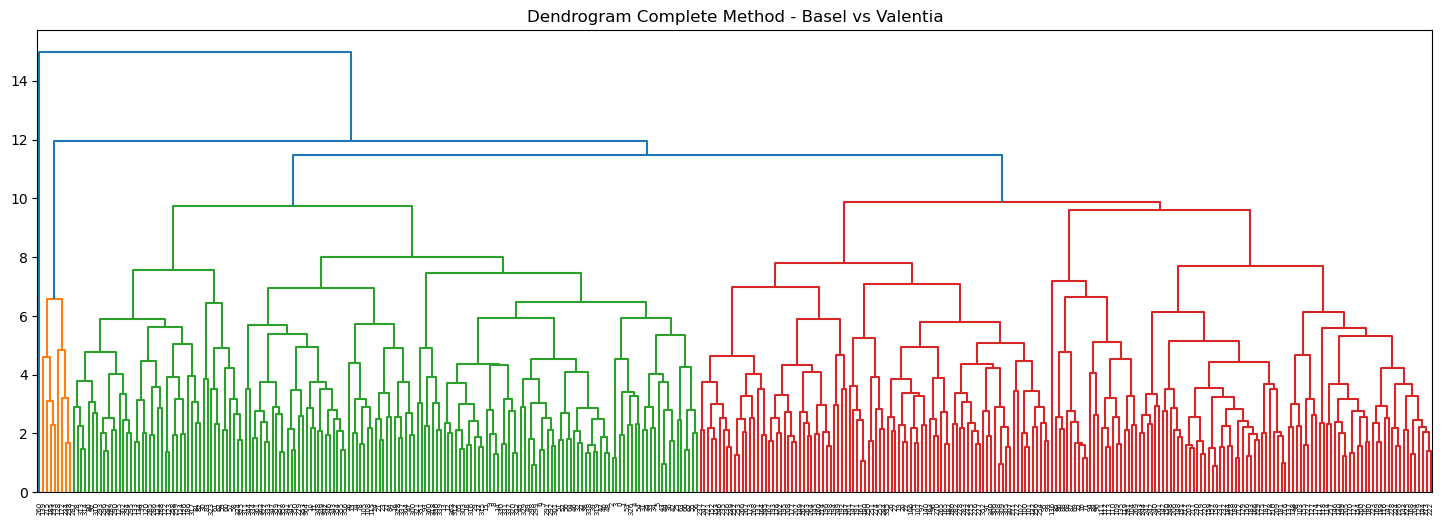

In [25]:
#Complete method
distance_complete = linkage(scaled_1993[columns_basel_valentia], method='complete')
plt.figure(figsize=(18, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.title('Dendrogram Complete Method - Basel vs Valentia')
plt.show()

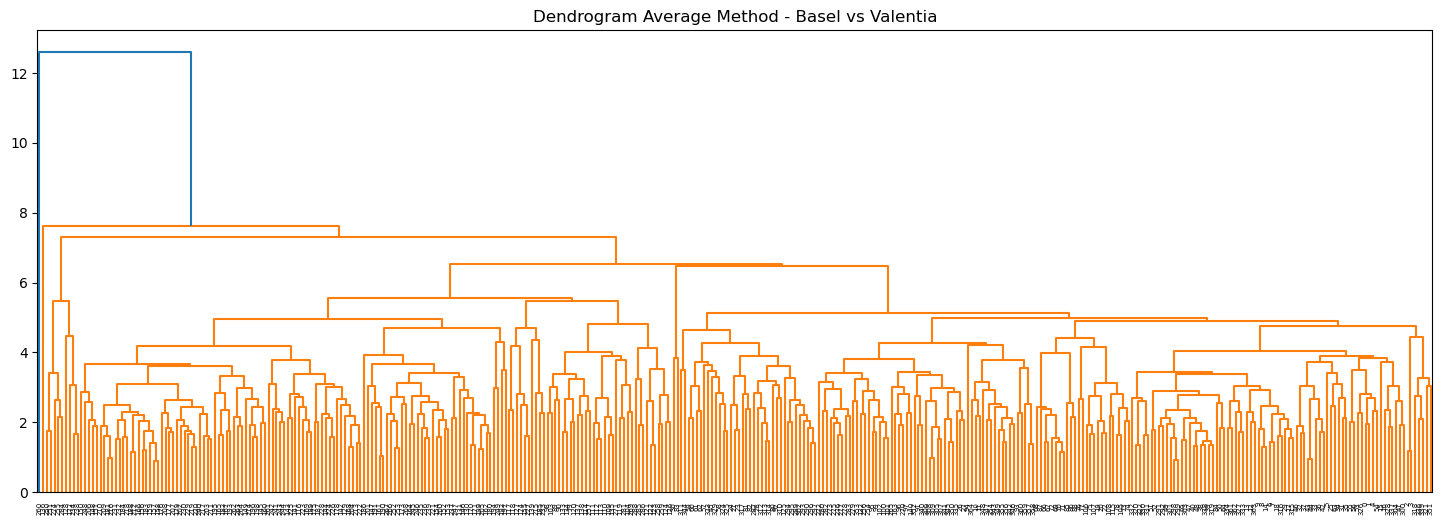

In [26]:
#Average method
distance_average = linkage(scaled_1993[columns_basel_valentia], method='average')
plt.figure(figsize=(18, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.title('Dendrogram Average Method - Basel vs Valentia')
plt.show()

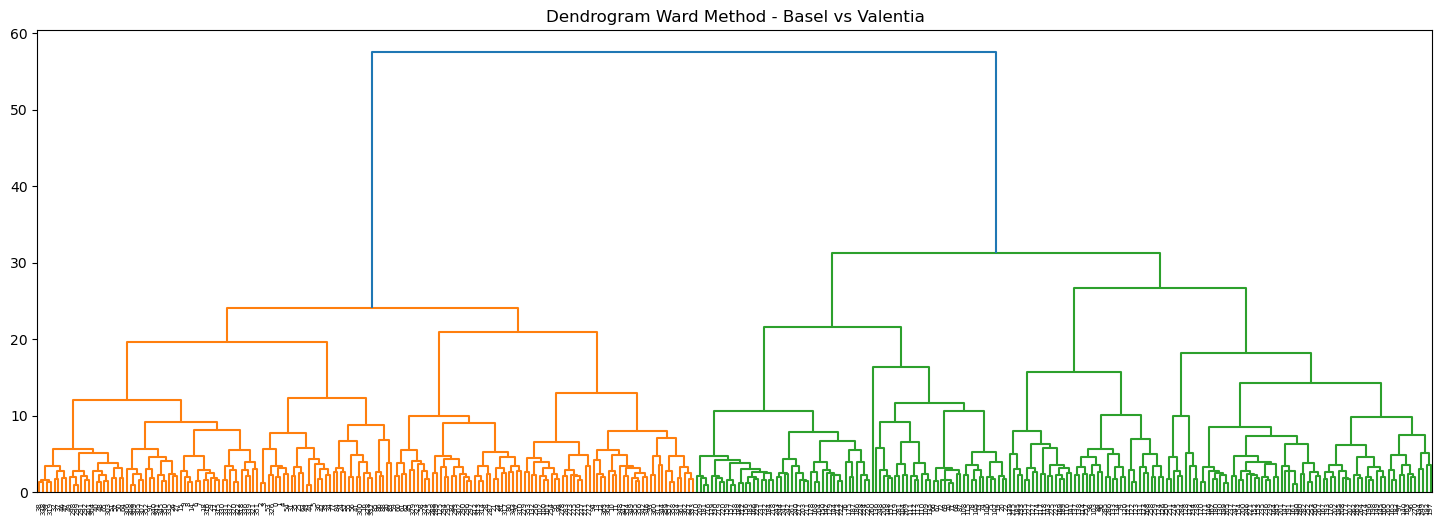

In [27]:
#Ward method
distance_ward = linkage(scaled_1993[columns_basel_valentia], method='ward')
plt.figure(figsize=(18, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.title('Dendrogram Ward Method - Basel vs Valentia')
plt.show()

In [28]:
#All stations column list
columns_all_stations = scaled_1993.columns.drop(['DATE', 'MONTH'])  # Excluding non-climate variables


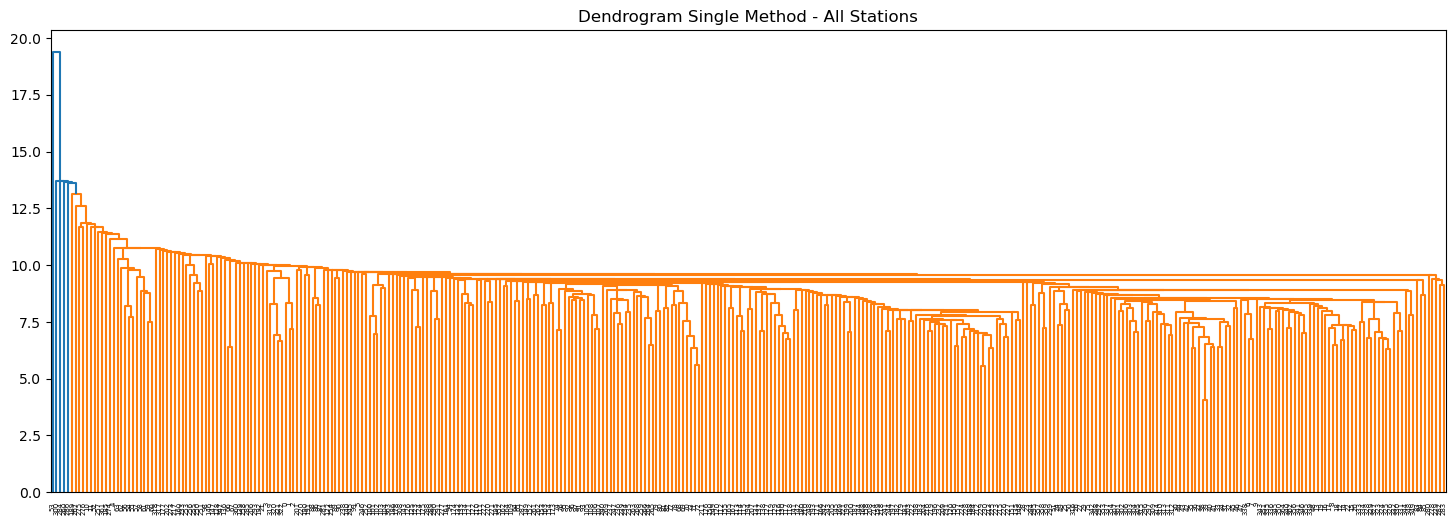

In [29]:
#Single method for all stations
distance_single_all = linkage(scaled_1993[columns_all_stations], method='single')
plt.figure(figsize=(18, 6))
dendrogram(distance_single_all, leaf_rotation=90)
plt.title('Dendrogram Single Method - All Stations')
plt.show()



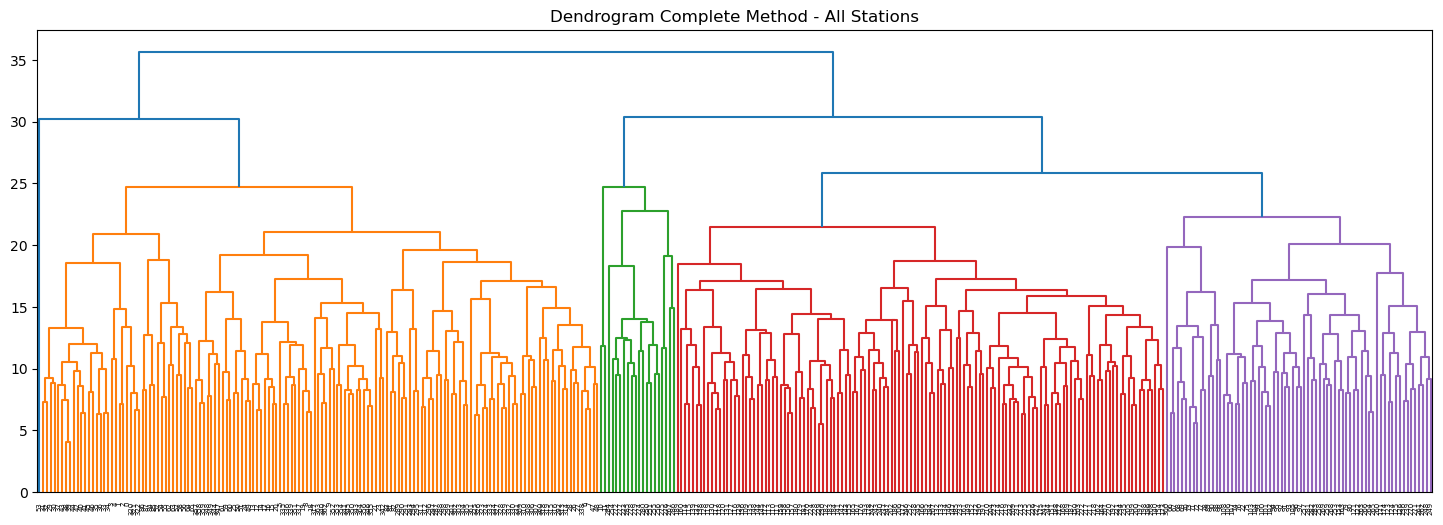

In [30]:
#Complete method for all stations
distance_complete_all = linkage(scaled_1993[columns_all_stations], method='complete')
plt.figure(figsize=(18, 6))
dendrogram(distance_complete_all, leaf_rotation=90)
plt.title('Dendrogram Complete Method - All Stations')
plt.show()

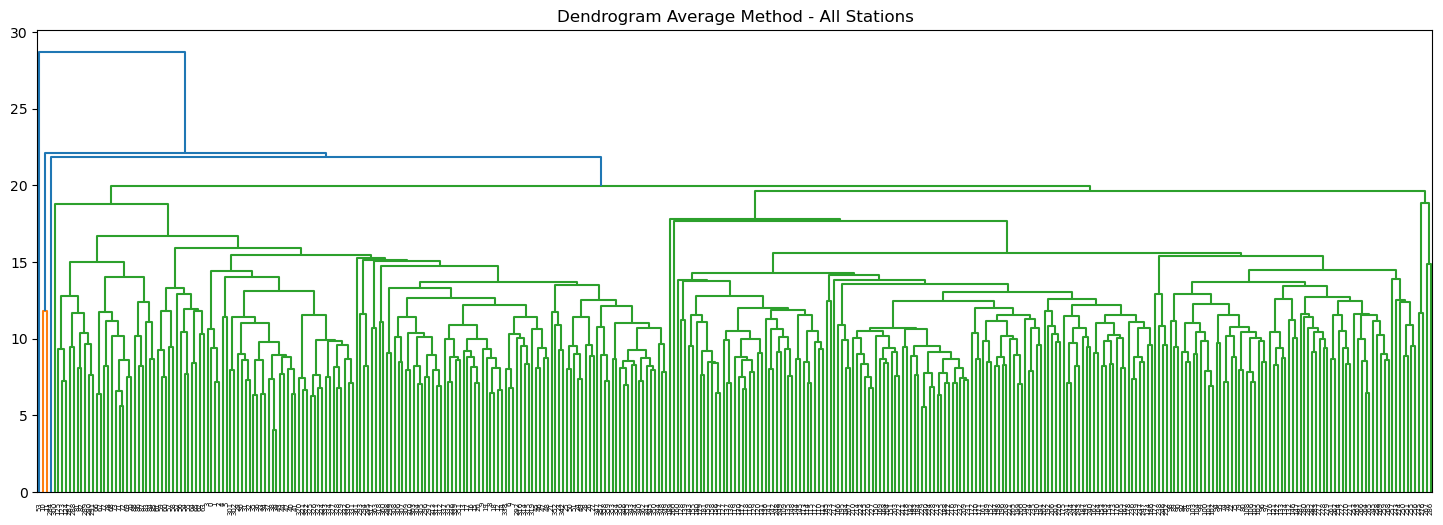

In [31]:
#Average method for all stations
distance_average_all = linkage(scaled_1993[columns_all_stations], method='average')
plt.figure(figsize=(18, 6))
dendrogram(distance_average_all, leaf_rotation=90)
plt.title('Dendrogram Average Method - All Stations')
plt.show()



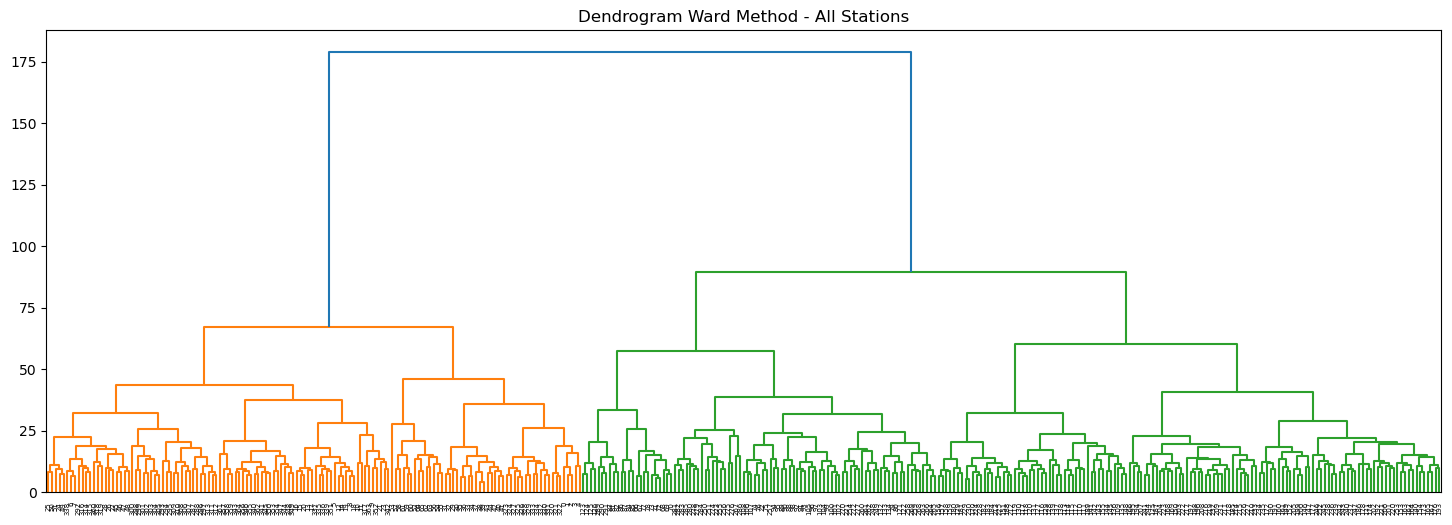

In [32]:
#Ward method for all stations
distance_ward_all = linkage(scaled_1993[columns_all_stations], method='ward')
plt.figure(figsize=(18, 6))
dendrogram(distance_ward_all, leaf_rotation=90)
plt.title('Dendrogram Ward Method - All Stations')
plt.show()

In [33]:
#Columns for Heathrow, Madrid, and Gdansk
columns_hmg = [
    'HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 'HEATHROW_precipitation',
    'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max',
    'MADRID_cloud_cover', 'MADRID_humidity', 'MADRID_pressure', 'MADRID_precipitation',
    'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max',
    'GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_pressure', 'GDANSK_precipitation',
    'GDANSK_sunshine', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max'
]

In [35]:
#Print out all column names to see if there are any that match Gdansk, Heathrow, Madrid data
print(scaled_1993.columns)


Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)


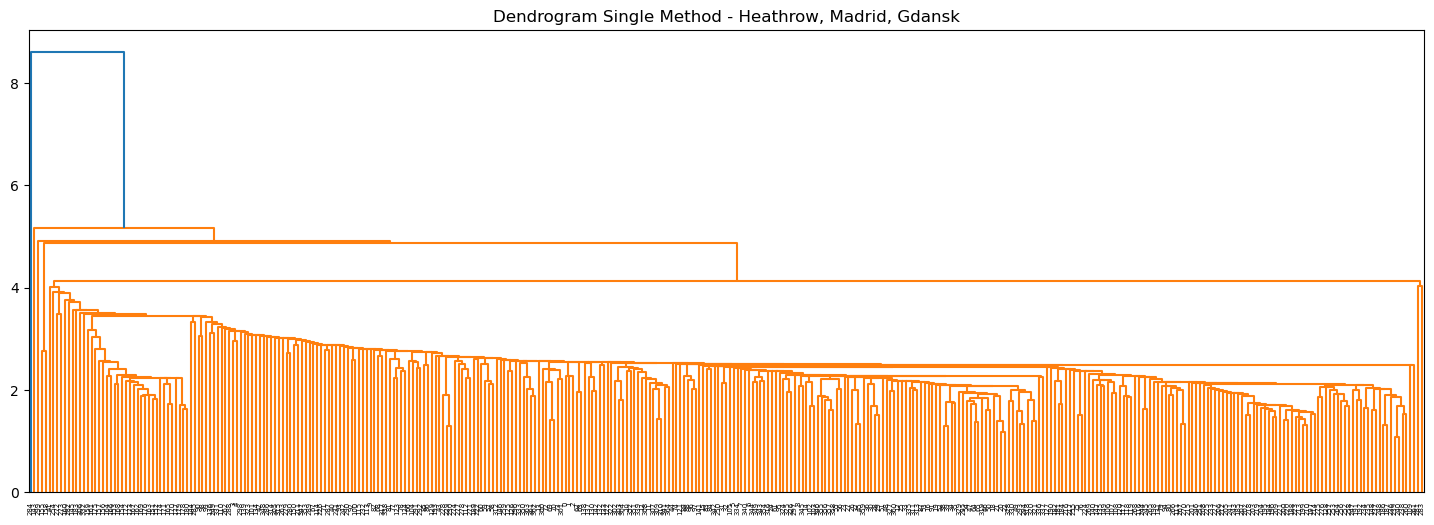

In [36]:
columns_hmg = [
    'HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 'HEATHROW_precipitation',
    'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max',
    'MADRID_cloud_cover', 'MADRID_humidity', 'MADRID_pressure', 'MADRID_precipitation',
    'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max',
    # Replace the below with correct columns for Gdansk if they exist
    'GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max'
]

#Single method
distance_single_hmg = linkage(scaled_1993[columns_hmg], method='single')
plt.figure(figsize=(18, 6))
dendrogram(distance_single_hmg, leaf_rotation=90)
plt.title('Dendrogram Single Method - Heathrow, Madrid, Gdansk')
plt.show()


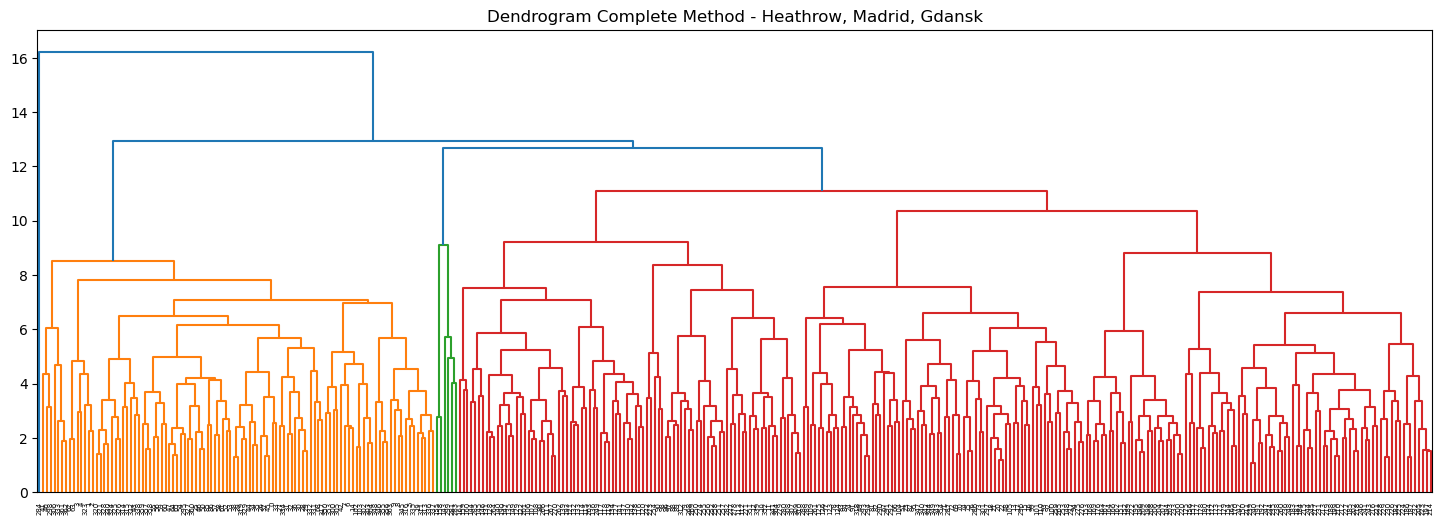

In [37]:
#Complete method
distance_complete_hmg = linkage(scaled_1993[columns_hmg], method='complete')
plt.figure(figsize=(18, 6))
dendrogram(distance_complete_hmg, leaf_rotation=90)
plt.title('Dendrogram Complete Method - Heathrow, Madrid, Gdansk')
plt.show()

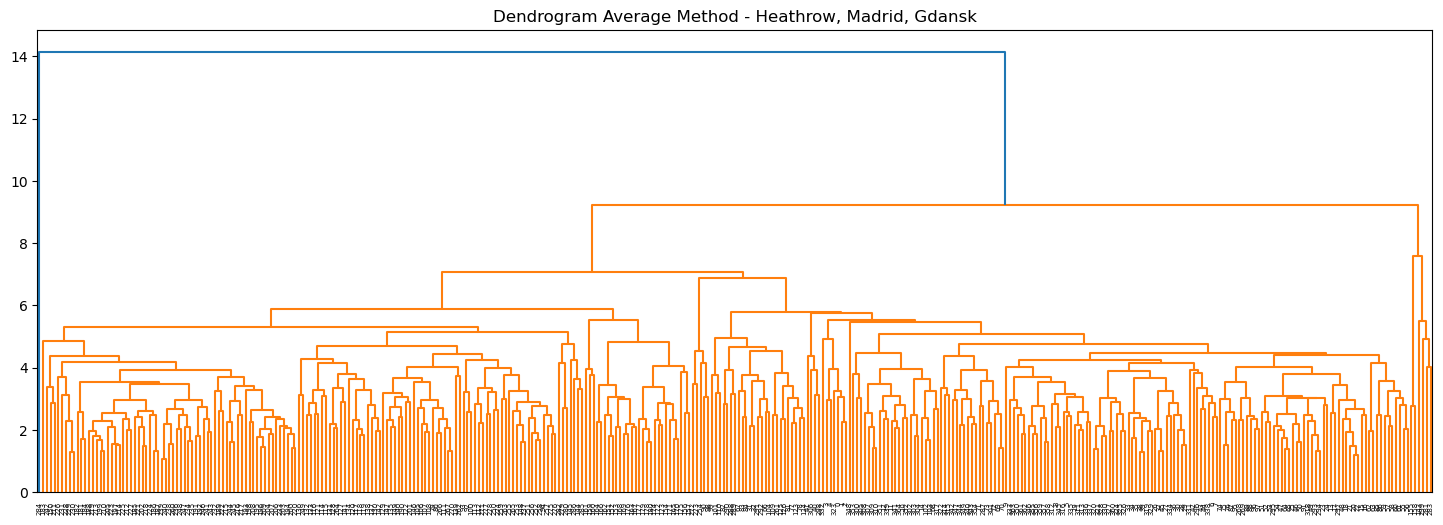

In [38]:
#Average method
distance_average_hmg = linkage(scaled_1993[columns_hmg], method='average')
plt.figure(figsize=(18, 6))
dendrogram(distance_average_hmg, leaf_rotation=90)
plt.title('Dendrogram Average Method - Heathrow, Madrid, Gdansk')
plt.show()

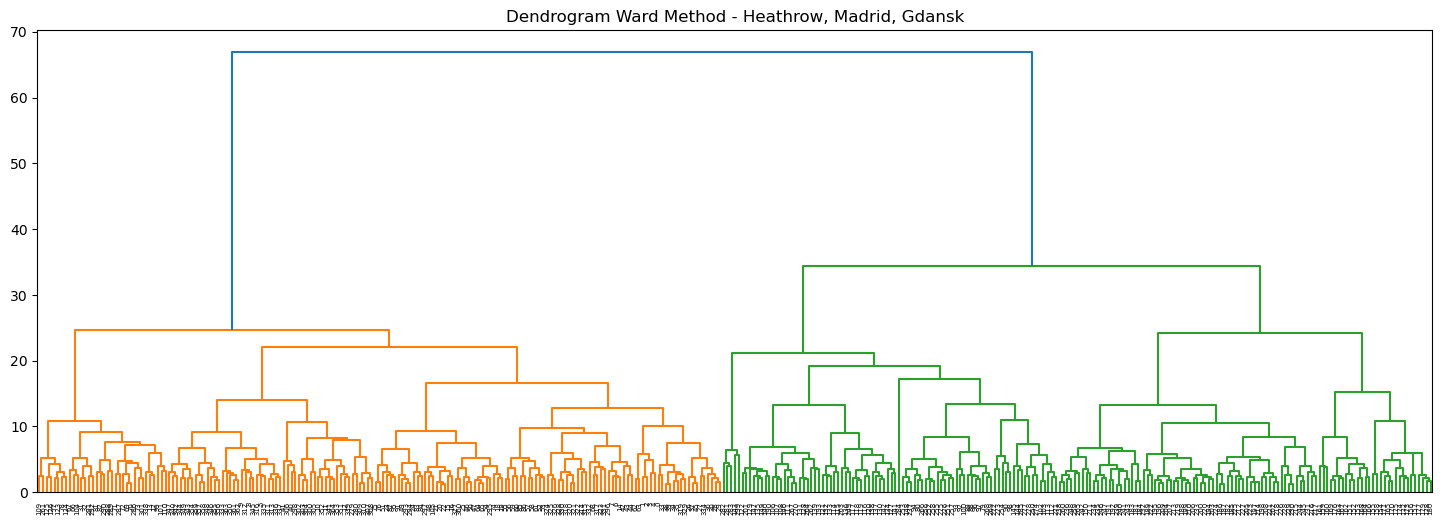

In [39]:
#Ward method
distance_ward_hmg = linkage(scaled_1993[columns_hmg], method='ward')
plt.figure(figsize=(18, 6))
dendrogram(distance_ward_hmg, leaf_rotation=90)
plt.title('Dendrogram Ward Method - Heathrow, Madrid, Gdansk')
plt.show()

In [47]:
from sklearn.decomposition import PCA

# Choosing the number of components for PCA
pca = PCA(n_components=11)

# Fitting the PCA on the scaled data
principal_components = pca.fit_transform(scaled_1993)  # assuming scaled_1993 is the scaled dataset


In [48]:
# Creating a DataFrame for the principal components
dfPCA = pd.DataFrame(principal_components, columns=[f'PCA{i+1}' for i in range(11)])
dfPCA.head()  # Display the first few rows of the PCA results

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,13.029581,-8.159300,-0.542103,-0.753256,-0.732520,-0.055391,-1.526492,0.638336,1.462072,2.529609,2.191112
1,14.033482,-9.137218,2.568679,0.161227,0.994441,0.026296,0.555316,0.986800,3.798334,4.376284,3.080025
2,14.731734,-9.591428,2.859145,0.679216,0.295898,-0.078423,1.248129,0.040303,2.091260,4.031812,3.351714
3,13.971065,-7.097357,-0.733989,1.852155,0.022935,2.458627,-0.559513,-0.054580,1.485262,3.889842,-0.072839
4,11.551286,-5.166545,-5.484888,4.425675,2.026272,0.819169,1.571972,0.219127,1.109231,3.646102,0.220728


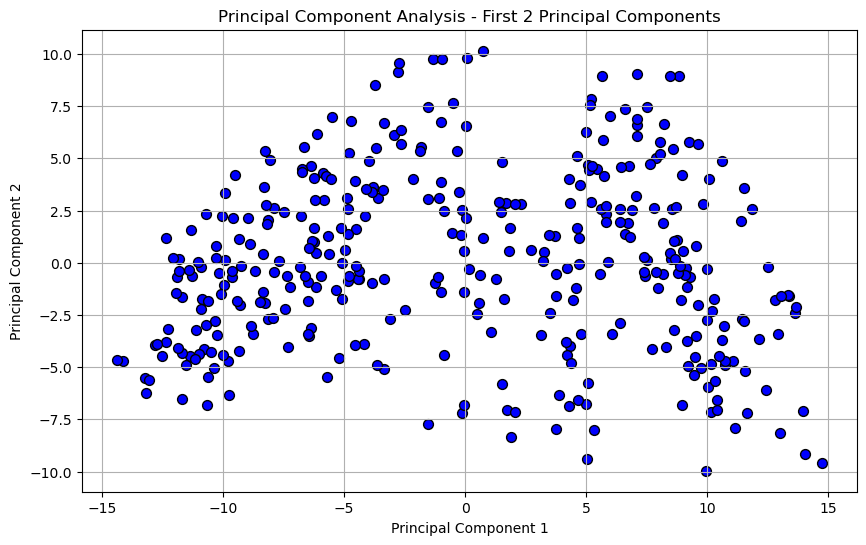

In [49]:
import matplotlib.pyplot as plt

# Plotting the first two principal components for visualization
plt.figure(figsize=(10, 6))
plt.scatter(dfPCA['PCA1'], dfPCA['PCA2'], c='blue', edgecolor='k', s=50)
plt.title('Principal Component Analysis - First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [50]:
# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by each component: {explained_variance}')

Explained Variance by each component: [0.3734455  0.10809652 0.05446046 0.04626679 0.0330402  0.02779149
 0.02506214 0.02084648 0.01482473 0.01364976 0.01260274]


In [51]:
# Exporting the PCA dataset to a CSV file
dfPCA.to_csv('PCA_reduced_dataset.csv', index=False)